___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
from pandas_datareader import data, wb
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [3]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [4]:
df = yf.download(tickers=tickers, start=start, end=end)

[*********************100%***********************]  6 of 6 completed


** Check the head of the bank_stocks dataframe.**

In [5]:
df.head()

Price           Close                                                          \
Ticker            BAC           C         GS        JPM         MS        WFC   
Date                                                                            
2006-01-03  31.370411  324.013153  95.765640  24.241714  32.190895  18.778103   
2006-01-04  31.037235  318.031189  94.442871  24.101793  32.212997  18.560312   
2006-01-05  31.077230  319.608887  94.405762  24.174799  32.301338  18.539707   
2006-01-06  31.030582  319.608887  95.743362  24.345142  32.334450  18.648605   
2006-01-09  31.050568  318.096863  96.895195  24.740540  32.676727  18.645657   

Price            High                                    ...       Open  \
Ticker            BAC           C         GS        JPM  ...         GS   
Date                                                     ...              
2006-01-03  31.437042  324.604774  96.189223  24.344256  ...  94.153075   
2006-01-04  31.477007  322.764195  95.795351  24.418122  ...  94.636083   
2006-01-05  31.203833  320.660648  94.613834  24.217381  ...  93.632918   
2006-01-06  31.257132  321.449489  96.048044  24.478974  ...  94.591532   
2006-01-09  31.297108  320.397625  97.066109  24.770958  ...  95.490702   

Price                                          Volume                    \
Ticker            JPM         MS        WFC       BAC        C       GS   
Date                                                                      
2006-01-03  24.024572  31.561540  18.601507  16296700  1537600  6188700   
2006-01-04  24.199125  32.406221  18.719248  17757900  1870960  4861600   
2006-01-05  24.095716  32.323421  18.542650  14970700  1143160  3717400   
2006-01-06  24.284309  32.444863  18.589740  12599800  1370210  4319600   
2006-01-09  24.259965  32.367572  18.645657  15619400  1680740  4723500   

Price                                    
Ticker           JPM       MS       WFC  
Date                                     
2006-01-03  12838600  5377000  11016400  
2006-01-04  13491500  7977800  10870000  
2006-01-05   8109400  5778000  10158000  
2006-01-06   7966900  6889800   8403800  
2006-01-09  16575200  4144500   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [6]:
df.xs(key='Close', level='Price', axis=1).max()

Ticker
BAC     37.937496
C      386.292664
GS     186.998795
JPM     53.933907
MS      50.462811
WFC     44.268101
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [7]:
df.xs(key='Close', axis=1, level='Price').iloc[:, :1].head()

Ticker,BAC
Date,
2006-01-03,31.370411
2006-01-04,31.037235
2006-01-05,31.077230
2006-01-06,31.030582
2006-01-09,31.050568


In [8]:
df.xs(key='Close', axis=1, level='Price').iloc[:, :1].apply(lambda r : r.pct_change()).head()

Ticker,BAC
Date,
2006-01-03,NaN
2006-01-04,-0.010621
2006-01-05,0.001289
2006-01-06,-0.001501
2006-01-09,0.000644


In [9]:
returns = df.xs(key='Close', axis=1, level='Price').pct_change()
returns.head()

Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010621,-0.018462,-0.013813,-0.005772,0.000687,-0.011598
2006-01-05,0.001289,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016241,0.010586,-0.000158


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

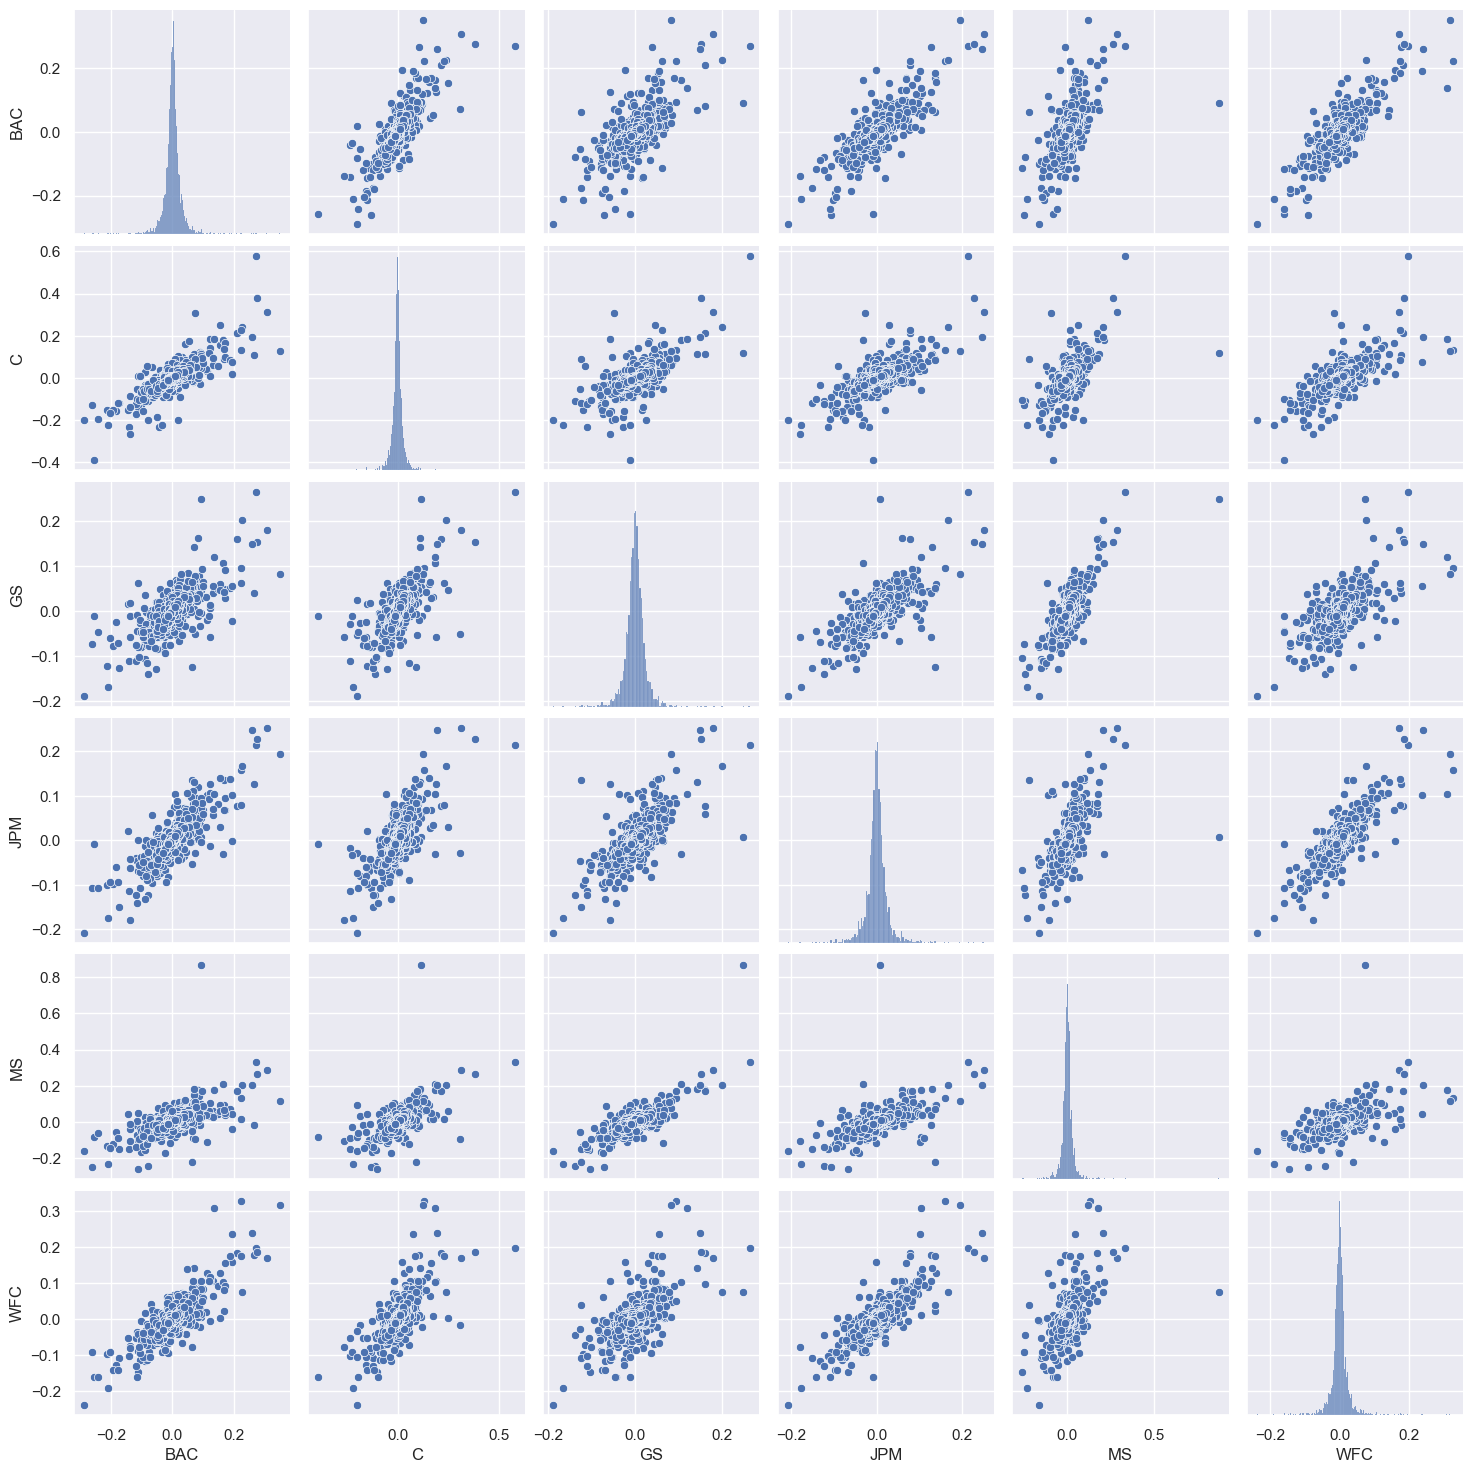

In [10]:
sns.pairplot(returns)

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [11]:
returns.min()

Ticker
BAC   -0.289694
C     -0.390244
GS    -0.189596
JPM   -0.207274
MS    -0.258928
WFC   -0.238223
dtype: float64

In [12]:
returns.idxmin()

Ticker
BAC   2009-01-20
C     2009-02-27
GS    2009-01-20
JPM   2009-01-20
MS    2008-10-09
WFC   2009-01-20
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [13]:
returns.std()

Ticker
BAC    0.036659
C      0.038672
GS     0.025386
JPM    0.027675
MS     0.037717
WFC    0.030195
dtype: float64

In [14]:
returns.loc['2015-01-01':'2015-12-31'].std()

Ticker
BAC    0.016174
C      0.015288
GS     0.014043
JPM    0.014006
MS     0.016287
WFC    0.012552
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

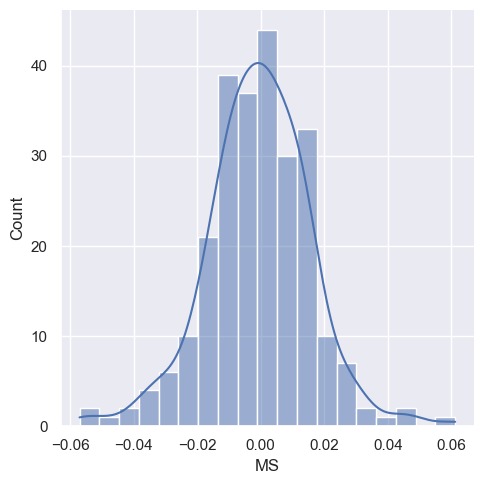

In [15]:
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS'], kde=True)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

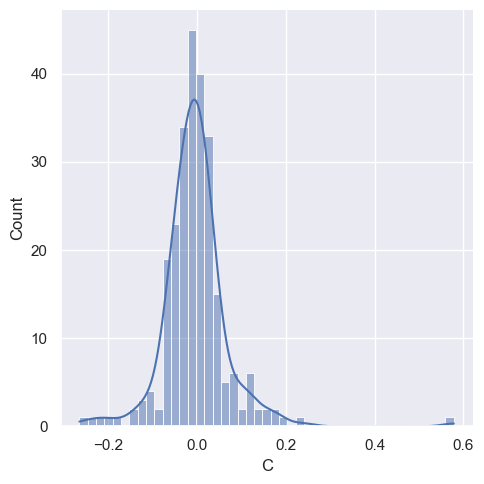

In [16]:
sns.displot(returns.loc['2008-01-01':'2008-12-31']['C'], kde=True)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [17]:
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

<Axes: xlabel='Date'>

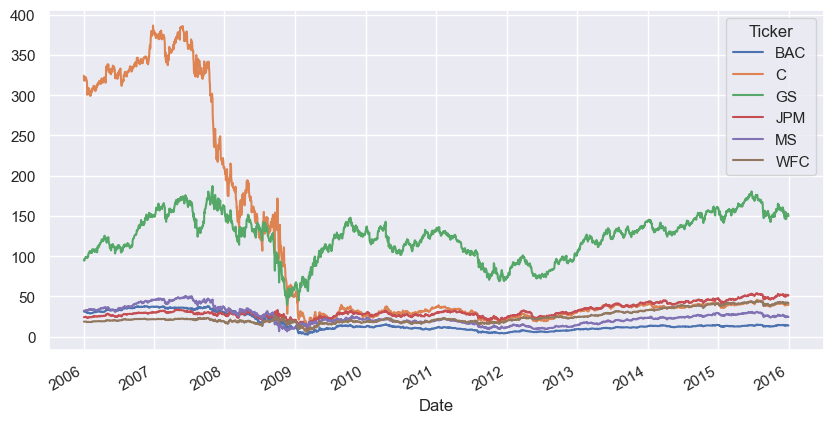

In [18]:
df.xs(key='Close', level='Price', axis=1).plot(figsize=(10,5))

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [19]:
df.xs(key='BAC', level='Ticker', axis=1)['Close'].head()

Date
2006-01-03    31.370411
2006-01-04    31.037235
2006-01-05    31.077230
2006-01-06    31.030582
2006-01-09    31.050568
Name: Close, dtype: float64

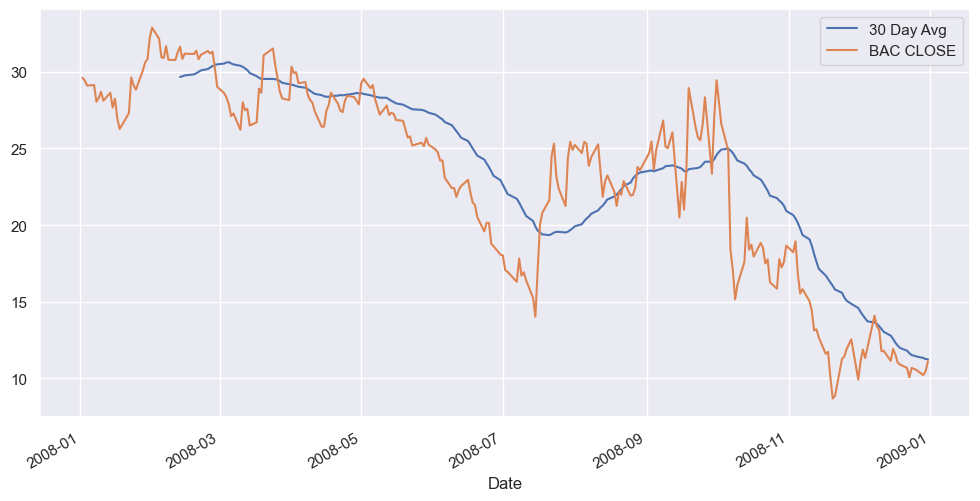

In [20]:
plt.figure(figsize=(12,6))
df.xs(key='BAC', level='Ticker', axis=1)['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
df.xs(key='BAC', level='Ticker', axis=1)['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

<Axes: xlabel='Ticker', ylabel='Ticker'>

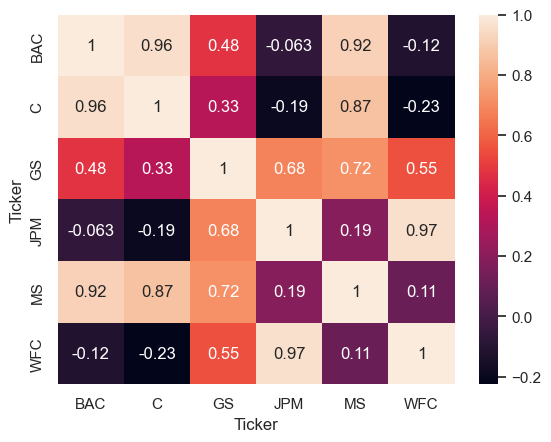

In [21]:
sns.heatmap(df.xs(key='Close',axis=1,level='Price').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

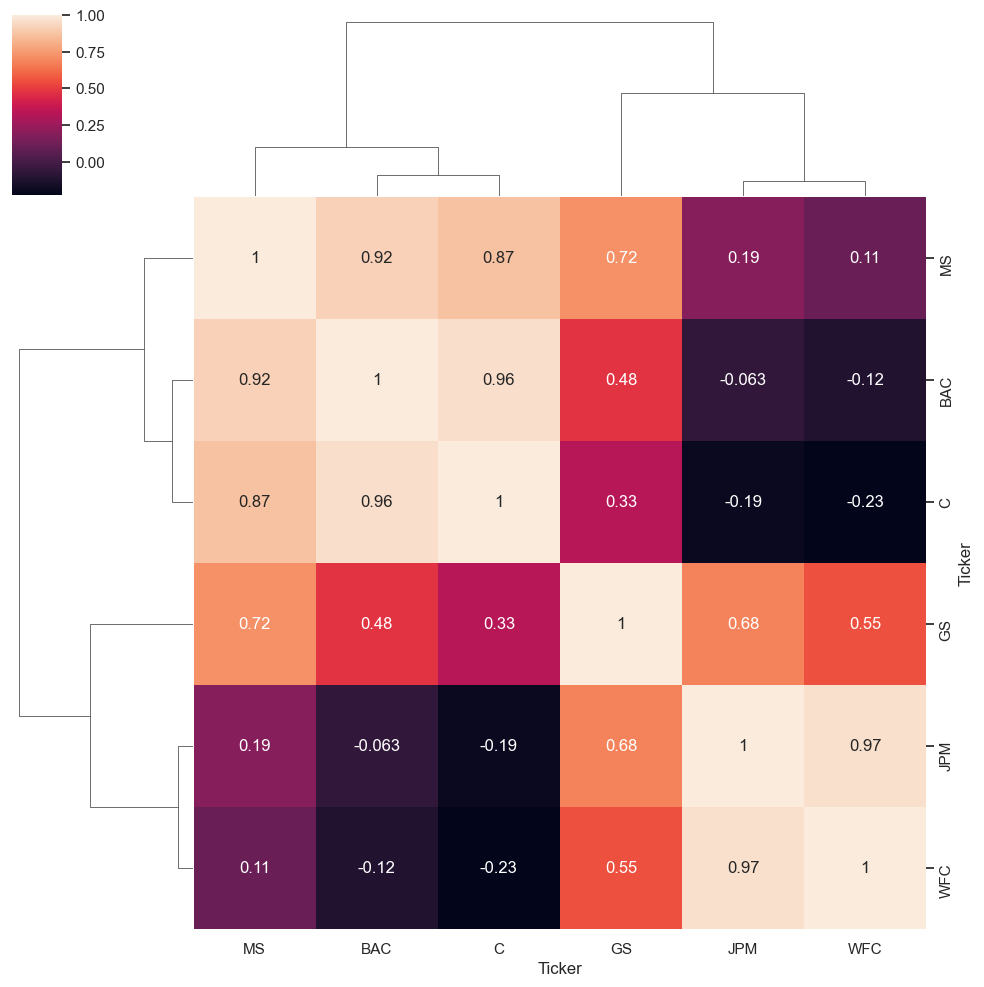

In [22]:
sns.clustermap(df.xs(key='Close',axis=1,level='Price').corr(),annot=True)

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.